In [1]:
import numpy as np 
import pandas as pd
import os
from pandas import read_csv
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import mean_squared_error

In [2]:
payments = pd.read_csv('PS_20174392719_1491204439457_log.csv')
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
payments.shape

(6362620, 11)

In [4]:
payments['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
# Exploring transaction type
print(payments.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [6]:
8213/6354407*100

0.129248881917699

[Text(0.5, 1.0, 'Correlation Matrix')]

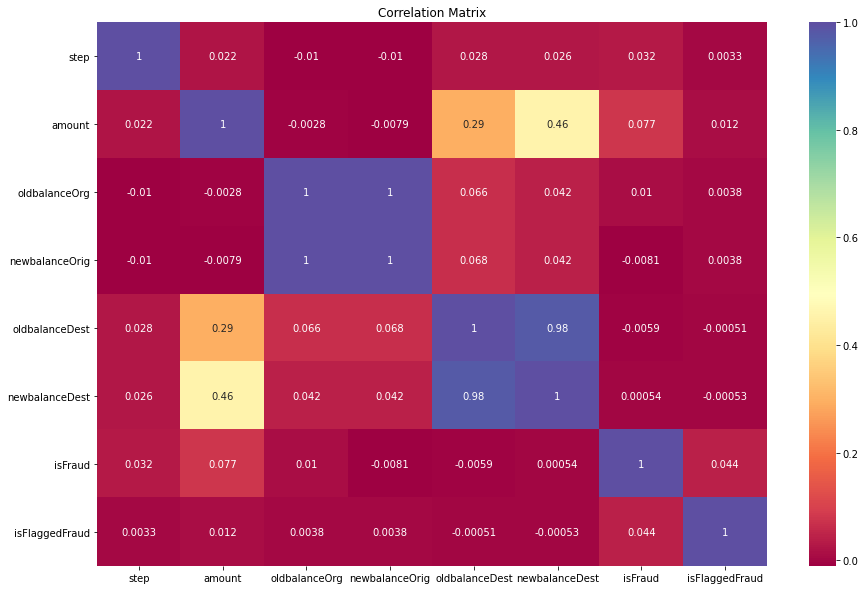

In [7]:
corr = payments.corr() 
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [8]:
type_new = pd.get_dummies(payments['type'],drop_first=True)
type_new

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


In [9]:
payments = pd.concat([payments,type_new],axis=1)
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [10]:
payments_2 = payments.drop(['type','nameOrig','nameDest'],axis = 1)
payments_2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [11]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(payments_2,target = 'isFraud', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

In [12]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2912512,229,8766.04,0.00,0.00,0.00,0.00,0,0,0,1,0
760408,38,658151.99,343619.00,0.00,491939.49,1150091.48,0,0,0,0,1
3176866,238,194822.52,194215.88,0.00,6152545.19,6347367.72,0,1,0,0,0
1702076,159,100590.06,0.00,0.00,10548063.43,10648653.50,0,1,0,0,0
1180141,132,3970.89,48170.01,44199.11,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3460009,257,236539.66,549.00,0.00,1260768.98,1497308.65,0,1,0,0,0
389040,17,200520.01,31283.00,0.00,238244.06,438764.08,0,1,0,0,0
5305689,373,206683.19,188139.00,394822.19,1981624.11,1774940.92,0,0,0,0,0
3101846,235,12116.00,0.00,0.00,0.00,0.00,0,0,0,1,0


Text(0, 0.5, 'isFraud')

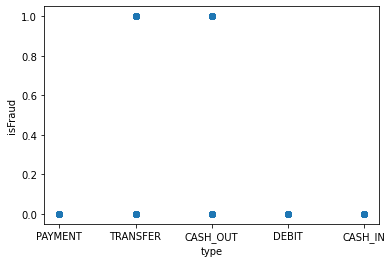

In [13]:
plt.scatter(x='type',y='isFraud',data=payments)
plt.xlabel('type')
plt.ylabel('isFraud')

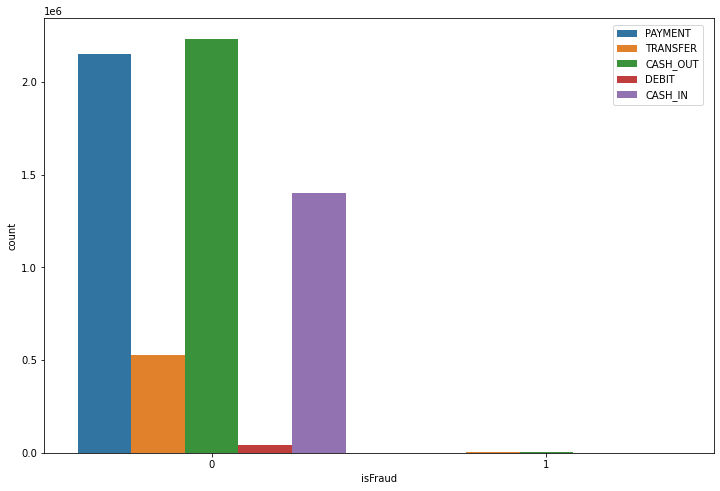

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=payments,hue='type')
plt.legend(loc=[0.85,0.8])

# Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions.

# Hypothesis Degree 1

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = X_train

# Logistic Regression Model
lr = LogisticRegression().fit(X,y_train)

# Regularization Ridge Model
ridge_model_1 = make_pipeline(PolynomialFeatures(degree=1),Ridge(alpha=1)).fit(X,y_train)

# model evaluation for training set
y_train_predict = lr.predict(X)
# model evaluation for valdation set
y_valid_predict = lr.predict(X_valid)
# model evaluation for testing set
y_test_predict = lr.predict(X_test)

y_test_predict_ridge = ridge_model_1.predict(X_test)

# Cross Validation
kf=KFold(n_splits=5)
score=cross_val_score(lr,X,y_train,cv=kf)
score11 = cross_val_score(lr,X_test,y_test,cv=kf)

score_ridge1 = cross_val_score(ridge_model_1,X,y_train,cv=kf)
score_ridge11 = cross_val_score(ridge_model_1,X_test,y_test,cv=kf)

print("Cross Validation Scores for train are {}".format(score))
print("Cross Validation Scores for test are {}".format(score11))
print("Cross Validation Scores for ridge train are {}".format(score_ridge1))
print("Cross Validation Scores for ridge test are {}".format(score_ridge11))
print("Average Cross Validation score for training set :{}".format(score.mean()))
print("Average Cross validation score for test set :{}".format(score11.mean()))

# Regularization train and test scores
print("Average Cross validation score for ridge(train) set :{}".format(score_ridge1.mean()))
print("Average Cross validation score for ridge(test) set :{}".format(score_ridge11.mean()))

Cross Validation Scores for train are [0.99827214 0.99824758 0.99836054 0.99823088 0.99829276]
Cross Validation Scores for test are [0.99853049 0.99838118 0.99834187 0.99819256 0.99834187]
Cross Validation Scores for ridge train are [0.18563898 0.18659722 0.17505548 0.18353849 0.19369815]
Cross Validation Scores for ridge test are [0.19955495 0.20226959 0.19815738 0.1680559  0.17246739]
Average Cross Validation score for training set :0.9982807789889705
Average Cross validation score for test set :0.9983575945184923
Average Cross validation score for ridge(train) set :0.18490566607040032
Average Cross validation score for ridge(test) set :0.18810104351959833


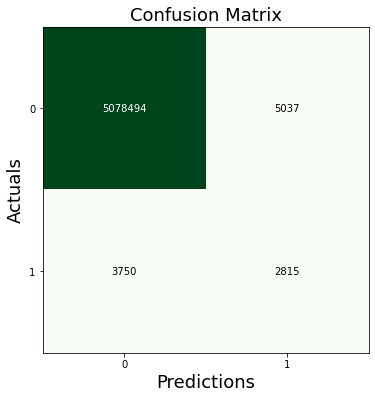

array([[5078494,    5037],
       [   3750,    2815]], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_train_predict)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Train set)', fontsize=18)
plt.show()
conf_matrix

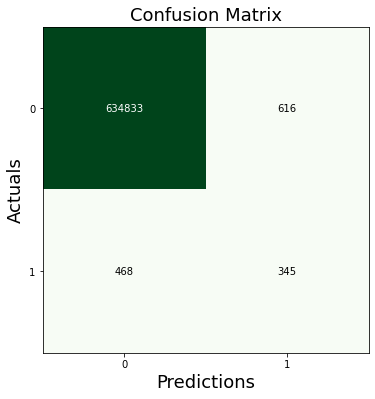

array([[634833,    616],
       [   468,    345]], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_predict)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Test set', fontsize=18)
plt.show()
conf_matrix

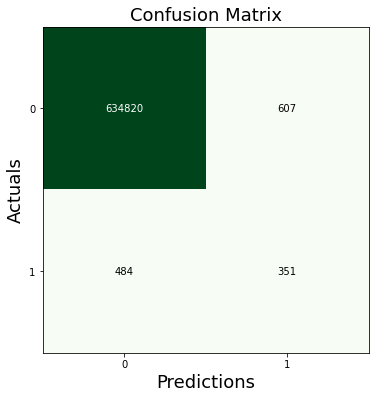

array([[634820,    607],
       [   484,    351]], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_valid_predict)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Valid set)', fontsize=18)
plt.show()
conf_matrix

# Hypothesis Degree 2

In [13]:
#Training and Cross Validation hypothesis degree *2*
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = X_train[['CASH_OUT','DEBIT','PAYMENT','TRANSFER']]
X2 = X_test[['CASH_OUT','DEBIT','PAYMENT','TRANSFER']]

poly2 = PolynomialFeatures(degree=2)
X_train_poly= poly2.fit_transform(X)
X_test_poly= poly2.fit_transform(X2)


# Logistic Regression Model with degree *2*
lr2 = LogisticRegression().fit(X_train_poly,y_train)

# Regularization Ridge Model
ridge_model_2 = make_pipeline(poly2,Ridge(alpha=1))

# model evaluation for training set
y_train_predicted = lr2.predict(X_train_poly)

# model evaluation for training set
y_valid_predicted = lr2.predict(poly2.fit_transform(X_valid[['CASH_OUT','DEBIT','PAYMENT','TRANSFER']]))

# model evaluation for test set
y_test_predicted = lr2.predict(X_test_poly)


# Cross Validation
kf=KFold(n_splits=5)
score=cross_val_score(lr2,X_train_poly,y_train,cv=kf)
score12 = cross_val_score(lr2,X_test_poly,y_test,cv=kf)

score_ridge2 = cross_val_score(ridge_model_2,X_train_poly,y_train,cv=kf)
score_ridge12 = cross_val_score(ridge_model_2,X_test_poly,y_test,cv=kf)

print("Cross Validation Scores for train are {}".format(score))
print("Cross Validation Scores for test are {}".format(score12))
print("Cross Validation Scores for ridge train are {}".format(score_ridge2))
print("Cross Validation Scores for ridge test are {}".format(score_ridge12))
print("Average Cross Validation score for training set :{}".format(score.mean()))
print("Average Cross validation score for test set :{}".format(score12.mean()))

# Regularization train and test scores
print("Average Cross validation score for ridge(train) set :{}".format(score_ridge2.mean()))
print("Average Cross validation score for ridge(test) set :{}".format(score_ridge12.mean()))

Cross Validation Scores for train are [0.99873971 0.99870238 0.99873578 0.99869452 0.99869845]
Cross Validation Scores for test are [0.99867194 0.99885268 0.99860906 0.99865621 0.99865621]
Cross Validation Scores for ridge train are [0.00322595 0.00365346 0.00338669 0.0036171  0.00343254]
Cross Validation Scores for ridge test are [0.00302054 0.0029654  0.00322903 0.00403197 0.00335852]
Average Cross Validation score for training set :0.9987141696295039
Average Cross validation score for test set :0.9986892189912673
Average Cross validation score for ridge(train) set :0.003463147237605879
Average Cross validation score for ridge(test) set :0.003321093984581425


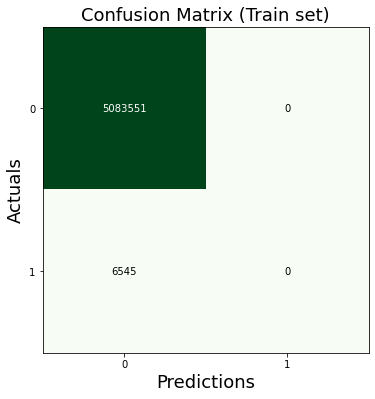

array([[5083551,       0],
       [   6545,       0]], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_train_predicted)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Train set)', fontsize=18)
plt.show()
conf_matrix

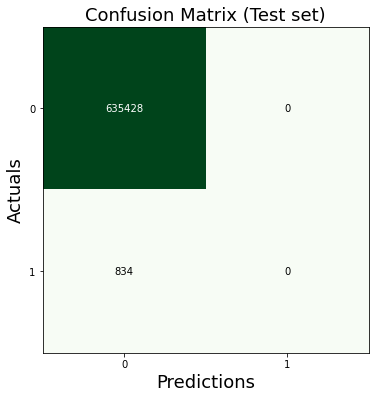

array([[635428,      0],
       [   834,      0]], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_predicted)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Test set)', fontsize=18)
plt.show()
conf_matrix

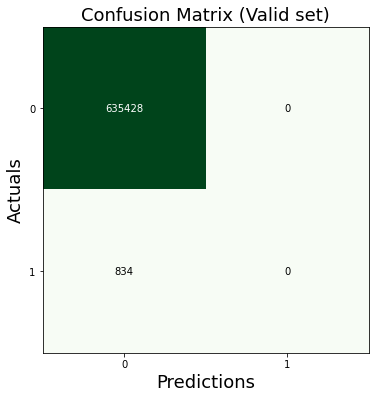

array([[635428,      0],
       [   834,      0]], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_valid_predicted)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Valid set)', fontsize=18)
plt.show()
conf_matrix

# Stratified Kfold Sampling technique
Stratified Sampling, Let the population for that state be 51.3% male and 48.7% female, Then for choosing 1000 people from that state if you pick 513 male ( 51.3% of 1000 ) and 487 female ( 48.7% for 1000 ) i.e 513 male + 487 female (Total=1000 people) to ask their opinion. Then these groups of people represent the entire state. This is called Stratified Sampling.

In [63]:
X = payments_2
y = payments_2['isFraud']

skf = StratifiedKFold(n_splits=5, random_state=1066, shuffle=True)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_trainn = X.iloc[train_index, :]
    y_trainn = y[train_index]
    X_testt = X.iloc[test_index, :]
    y_testt = y[test_index]

Train: [      0       1       2 ... 6362616 6362617 6362618] Test: [      5       8      11 ... 6362612 6362615 6362619]
Train: [      0       1       2 ... 6362616 6362618 6362619] Test: [      4       7      10 ... 6362601 6362609 6362617]
Train: [      0       3       4 ... 6362615 6362617 6362619] Test: [      1       2      13 ... 6362614 6362616 6362618]
Train: [      0       1       2 ... 6362617 6362618 6362619] Test: [      6      12      15 ... 6362604 6362606 6362613]
Train: [      1       2       4 ... 6362617 6362618 6362619] Test: [      0       3       9 ... 6362594 6362603 6362608]


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = X_trainn

# Logistic Regression Model
lr = LogisticRegression().fit(X,y_trainn)

# Regularization Ridge Model
ridge_model_1 = make_pipeline(PolynomialFeatures(degree=1),Ridge(alpha=1)).fit(X,y_trainn)

# model evaluation for training set
y_train_predict = lr.predict(X)
# model evaluation for testing set
y_test_predict = lr.predict(X_testt)

y_test_predict_ridge = ridge_model_1.predict(X_testt)

# Cross Validation
kf=KFold(n_splits=5)
score=cross_val_score(lr,X,y_trainn,cv=kf)
score11 = cross_val_score(lr,X_testt,y_testt,cv=kf)

score_ridge1 = cross_val_score(ridge_model_1,X,y_trainn,cv=kf)
score_ridge11 = cross_val_score(ridge_model_1,X_testt,y_testt,cv=kf)

print("Cross Validation Scores for train are {}".format(score))
print("Cross Validation Scores for test are {}".format(score11))
print("Cross Validation Scores for ridge train are {}".format(score_ridge1))
print("Cross Validation Scores for ridge test are {}".format(score_ridge11))
print("Average Cross Validation score for training set :{}".format(score.mean()))
print("Average Cross validation score for test set :{}".format(score11.mean()))

# Regularization train and test scores
print("Average Cross validation score for ridge(train) set :{}".format(score_ridge1.mean()))
print("Average Cross validation score for ridge(test) set :{}".format(score_ridge11.mean()))

Cross Validation Scores for train are [0.9748001  0.99966111 0.99959824 0.9996169  0.99727117]
Cross Validation Scores for test are [0.97388263 0.99967781 0.99964244 0.99966602 0.99755996]
Cross Validation Scores for ridge train are [0.99999995 0.99999996 0.99999996 0.99999995 0.99999989]
Cross Validation Scores for ridge test are [0.99999926 0.99999938 0.99999937 0.99999912 0.99999829]
Average Cross Validation score for training set :0.9941895043609005
Average Cross validation score for test set :0.9940857724288008
Average Cross validation score for ridge(train) set :0.9999999447213787
Average Cross validation score for ridge(test) set :0.9999990836419232


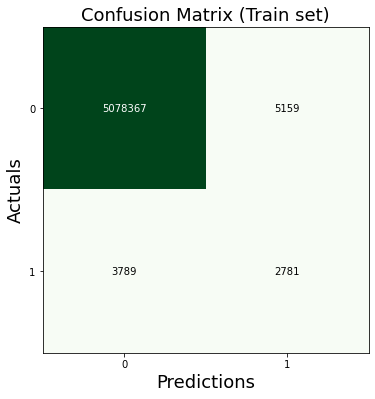

array([[5078367,    5159],
       [   3789,    2781]], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_trainn, y_pred=y_train_predict)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Train set)', fontsize=18)
plt.show()
conf_matrix

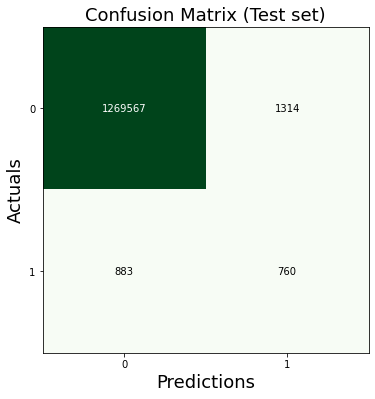

array([[1269567,    1314],
       [    883,     760]], dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_testt, y_pred=y_test_predict)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Test set)', fontsize=18)
plt.show()
conf_matrix

# Regularization (Ridge)

In [17]:
#find best alpha for Ridge Regression
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':np.arange(1,10,500)} #range from 1-500 with equal interval of 10 
ridge=Ridge() 
ridge_best_alpha=GridSearchCV(ridge, param_grid)
train = ridge_best_alpha.fit(X_train,y_train)

print("Best alpha for Ridge Regression for train:",train.best_params_)
print("Best score for Ridge Regression with best alpha:",train.best_score_)

Best alpha for Ridge Regression for train: {'alpha': 1}
Best score for Ridge Regression with best alpha: 0.18428571153418655


In [18]:
#find best alpha for Ridge Regression
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':np.arange(1,10,500)} #range from 1-500 with equal interval of 10 
ridge=Ridge() 
ridge_best_alpha=GridSearchCV(ridge, param_grid)
train = ridge_best_alpha.fit(X_train_poly,y_train)

print("Best alpha for Ridge Regression for train:",train.best_params_)
print("Best score for Ridge Regression with best alpha:",train.best_score_)

Best alpha for Ridge Regression for train: {'alpha': 1}
Best score for Ridge Regression with best alpha: 0.0034631472438823472
